In [11]:
import csv
import librosa 
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import random
import math

from librosa.core import load

In [12]:
import matplotlib
print(matplotlib.__version__)
print(librosa.__version__)

3.5.3
0.7.2


Mel Spectrogram

TypeError: __init__() got an unexpected keyword argument 'linthreshy'

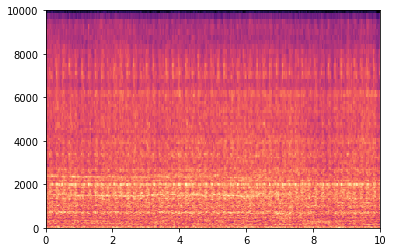

In [13]:
way = "/Users/sedoy/Desktop/Work Files/Программирование/УМНИК - обнаружение аномалий/Dataset/gearbox/test/section_00_source_test_anomaly_0002_volt_2.0.wav"
#y, sr = librosa.load(librosa.ex('trumpet'))
#librosa.feature.melspectrogram(y=y, sr=sr)
y, sr = librosa.load(way)

D = np.abs(librosa.stft(y))**2
S = librosa.feature.melspectrogram(S=D, sr=sr)

# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128,
                                    fmax=8000)

fig, ax = plt.subplots()
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sr,
                         fmax=10000, ax=ax)
ax.set(title='Mel-frequency spectrogram')


Text(0.5, 1.0, 'Reassigned spectrogram')

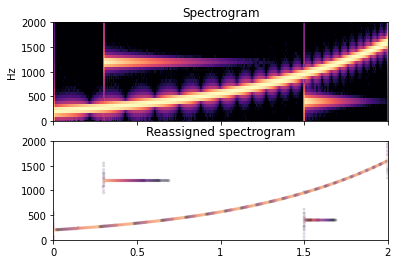

In [14]:
amin = 1e-10
n_fft = 64
sr = 4000
y = 1e-3 * librosa.clicks(times=[0.3], sr=sr, click_duration=1.0,
                          click_freq=1200.0, length=8000) +\
    1e-3 * librosa.clicks(times=[1.5], sr=sr, click_duration=0.5,
                          click_freq=400.0, length=8000) +\
    1e-3 * librosa.chirp(fmin=200, fmax=1600, sr=sr, duration=2.0) +\
    1e-6 * np.random.randn(2*sr)
freqs, times, mags = librosa.reassigned_spectrogram(y=y, sr=sr,
                                                    n_fft=n_fft)
mags_db = librosa.amplitude_to_db(mags, ref=np.max)

fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = librosa.display.specshow(mags_db, x_axis="s", y_axis="linear", sr=sr,
                         hop_length=n_fft//4, ax=ax[0])
ax[0].set(title="Spectrogram", xlabel=None)
ax[0].label_outer()
ax[1].scatter(times, freqs, c=mags_db, cmap="magma", alpha=0.1, s=5)
ax[1].set_title("Reassigned spectrogram")


TypeError: __init__() got an unexpected keyword argument 'linthreshy'

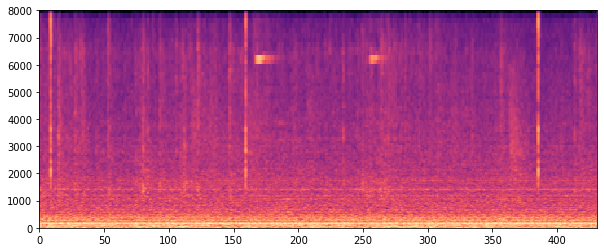

In [15]:
#D = np.abs(librosa.stft(y))**2
#S = librosa.feature.melspectrogram(S=D)

#way = "/Users/sedoy/Desktop/Work Files/Программирование/УМНИК - обнаружение аномалий/Dataset/gearbox/test/section_00_source_test_anomaly_0002_volt_2.0.wav"
way = "/Users/sedoy/Desktop/Work Files/Программирование/УМНИК - обнаружение аномалий/Dataset/valve/test/section_00_source_test_anomaly_0001_pat_00.wav"
#y, sr = librosa.load(librosa.ex('trumpet'))
#librosa.feature.melspectrogram(y=y, sr=sr)
y, sr = librosa.load(way)

# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S,ref=np.max), y_axis='mel', fmax=8000)
#plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()


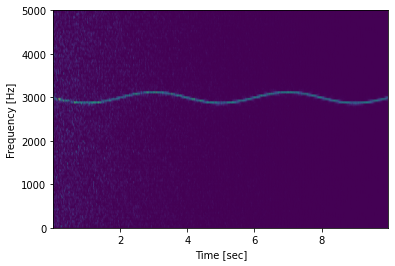

In [33]:
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt

rng = np.random.default_rng()
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = rng.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

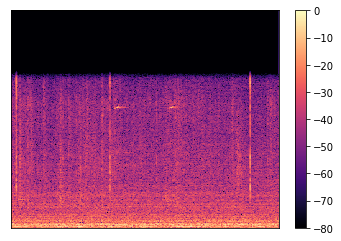

In [26]:
import numpy as np
import matplotlib.pyplot as plt

import librosa
import librosa.display

way = "/Users/sedoy/Desktop/Work Files/Программирование/УМНИК - обнаружение аномалий/Dataset/valve/test/section_00_source_test_anomaly_0001_pat_00.wav"
#y, sr = librosa.load(librosa.ex('trumpet'))
#librosa.feature.melspectrogram(y=y, sr=sr)
y, sr = librosa.load(way)
D = librosa.stft(y) 

# STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()

TypeError: __init__() got an unexpected keyword argument 'basey'

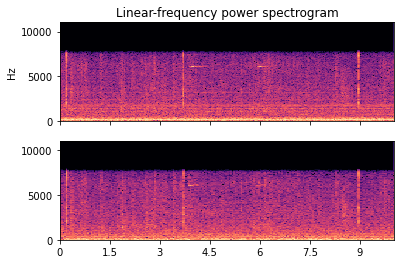

In [19]:
import matplotlib.pyplot as plt
way = "/Users/sedoy/Desktop/Work Files/Программирование/УМНИК - обнаружение аномалий/Dataset/valve/test/section_00_source_test_anomaly_0001_pat_00.wav"
#y, sr = librosa.load(librosa.ex('trumpet'))
#librosa.feature.melspectrogram(y=y, sr=sr)
y, sr = librosa.load(way)

fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length, x_axis='time')
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.f dB")

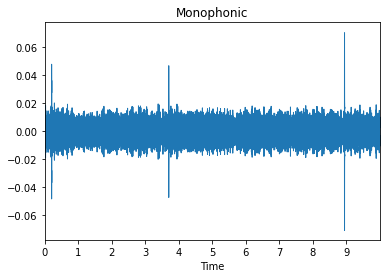

TypeError: __init__() got an unexpected keyword argument 'basey'

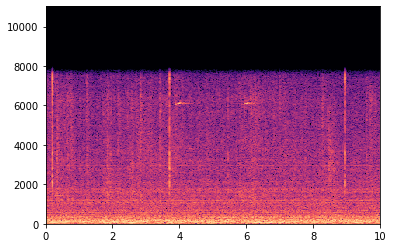

In [23]:
y, sr = librosa.load(way)
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True)
librosa.display.waveplot(y, sr=sr, ax=ax)
ax.set(title='Monophonic')
ax.label_outer()

plt.show()

S = np.abs(librosa.stft(y))
fig, ax = plt.subplots()
img = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                       ref=np.max),
                               y_axis='log', x_axis='time', ax=ax)
ax.set_title('Power spectrogram')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'get_array'

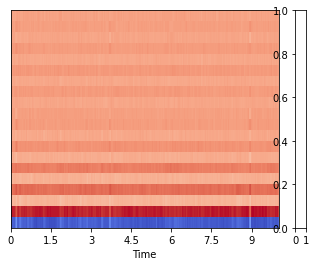

In [24]:
mfccs = librosa.feature.mfcc(y=y, sr=sr)

fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')
plt.show()